# Programming for Data Analysis Project

In [2]:
# Importing packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

## Introduction

### Proposal

Based on real world data, analyse, and synthesize a dataset. Based on this synthetization show if a adult men or women are more likely to be overweight, using their height, weight and BMI


### What is the definition of being overweight?

In simple terms, according with the [WHO](https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight#:~:text=For%20adults%2C%20WHO%20defines%20overweight,than%20or%20equal%20to%2030.), <i>overweight and obesity are defined as abnormal or excessive fat accumulation that may impair health</i>.


But how do we determine if someone is overweight, or in other words have excessive fat accumulation in their body? For that we use a index called BMI

### What is BMI

BMI stands for <i>Body mass index</i>. It is a simple index commonly used to classify if someone fits the overweight/obese or underweight spectrum. 

For Adults, if a person has a BMI greater than or equal to 25, they will be considered overweight. If their BMI is over 30, they will be considered obese. BMI provide a broad idea of a individual health and body fat situation and its table of classification is the same for both males and females. Because of that it is a good screening too, however it does not mean that both individuals with the same BMI will be affected the same way.

#### Why BMI is important and what a High BMI can tell about an individual?

BMI indices are often used as screening toll, by looking at a person BMI you can have a idea of the person, body fat ratio and asses if the individual may be on risk of getting affected for disease such as:
-	cardiovascular diseases
-	diabetes
-	and even some cancers
 

#### How BMI is calculate and BMI rates.

The formula to calculate a individual BMI is the person's weight in kilograms(kg) divided by the square of his height in meters.

In [42]:
#BMI calculation
# Height in Meters an weight in kg
height = 1.76
weight = 70

bmi = (weight) / (height)**2
print("Your BMI index is: {:.2f}".format(bmi))

Your BMI index is: 22.60


Using the [CDC BMI Table](https://www.cdc.gov/obesity/basics/adult-defining.html), the above individual would be classified as having a healthy weight.

- BMI is less than 18.5, it falls within the underweight range.
- If your BMI is 18.5 to <25, it falls within the healthy weight range.
- If your BMI is 25.0 to <30, it falls within the overweight range.
- If your BMI is 30.0 or higher, it falls within the obesity range.

# Real World Dataset

The dataset used was the [Finger Print Dataset](https://repository.lboro.ac.uk/articles/dataset/Height_weight_and_fingerprint_measurements_collected_from_200_participants/7539206) from the University of Loughtborough, authored by **Beth McMurchie**, **George TorrensGeorge Torrens** and **Paul Kelly**.

This dataset deals with the regression analysis to prove whether or not there is a relationship between the individual physical stature and their fingerprint size. Most of the dataset data was dropped as it was unrelated to the proposal of this project, the only data kept was the gender, height and weight of the participants.
You can see a snapshot of the original dataset below.

In [4]:
# Importing Database
df = pd.read_excel('200_participant_collected_data.xlsx')
df.head(10)

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
0,101,Male,NaN,Right,174.000000,70.000000,34.0,19.8,13.7,240.6,57.7
1,102,Male,NaN,Right,202.000000,99.000000,30.0,24.0,14.1,278.8,62.7
2,103,Male,NaN,Right,182.333333,82.000000,29.0,20.0,13.7,223.8,55.5
3,104,Male,NaN,Right,184.000000,75.000000,29.0,23.2,14.0,281.8,63.3
4,105,Male,18.0,Right,180.666667,80.333333,29.0,22.7,15.0,286.7,62.7
5,106,Male,20.0,Right,180.000000,59.000000,32.0,24.3,14.0,299.0,65.6
6,107,Female,NaN,Right,169.666667,71.000000,28.0,20.0,15.0,252.7,58.0
7,108,Male,NaN,Right,192.000000,81.000000,28.0,20.6,13.4,238.6,58.0
8,109,Male,NaN,Right,186.666667,74.000000,26.0,24.1,16.3,333.2,67.6
9,110,Male,NaN,Right,187.666667,85.000000,32.0,22.6,14.6,286.2,63.6


In [5]:
df.describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,200.000000,180.000000,200.000000,200.000000,184.000000,200.000000,200.000000,200.00000,200.0000
mean,200.500000,21.227778,173.170000,72.635000,28.690217,20.363500,13.487000,233.55300,56.5745
std,57.879185,4.728176,9.495657,14.245734,3.375695,2.032331,1.471754,43.52727,5.3133
min,101.000000,18.000000,148.000000,44.000000,22.000000,15.600000,9.900000,140.00000,44.2000
25%,150.750000,19.000000,167.250000,61.000000,26.000000,19.000000,12.300000,199.65000,52.6750
50%,200.500000,20.000000,173.000000,71.333333,29.000000,20.450000,13.600000,232.70000,56.6500
75%,250.250000,22.000000,180.000000,80.083333,31.000000,21.925000,14.500000,267.47500,60.7250
max,300.000000,56.000000,202.000000,122.666667,35.000000,25.800000,17.100000,358.90000,70.5000


In [6]:
df.loc[df['Gender'] == 'Male'].describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,113.000000,103.000000,113.000000,113.000000,104.000000,113.000000,113.000000,113.000000,113.000000
mean,201.504425,21.106796,178.474926,78.115044,29.038462,21.315929,14.309735,258.111504,59.562832
std,56.473465,3.217332,7.018796,11.881589,3.375880,1.601203,1.060994,31.758347,3.797231
min,101.000000,18.000000,164.000000,56.000000,22.000000,17.400000,12.000000,194.500000,51.800000
25%,156.000000,19.000000,173.000000,69.333333,26.750000,20.100000,13.600000,234.800000,56.800000
50%,209.000000,21.000000,177.666667,76.666667,30.000000,21.200000,14.200000,255.000000,59.500000
75%,248.000000,22.000000,183.666667,85.666667,31.250000,22.300000,14.900000,282.200000,62.400000
max,299.000000,41.000000,202.000000,112.000000,35.000000,25.800000,17.100000,358.900000,70.500000


In [7]:
df.loc[df['Gender'] == 'Female'].describe()

,Participant Number,Age,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
count,83.000000,73.000000,83.000000,83.000000,76.000000,83.000000,83.000000,83.000000,83.000000
mean,199.855422,21.424658,165.827309,64.807229,28.289474,19.033735,12.316867,198.837349,52.421687
std,61.282459,6.387744,7.485915,13.455046,3.273391,1.757581,1.146875,31.959814,4.230668
min,107.000000,18.000000,148.000000,44.000000,22.000000,15.600000,9.900000,140.000000,44.200000
25%,146.500000,19.000000,161.166667,56.000000,26.000000,17.500000,11.600000,175.800000,49.350000
50%,187.000000,19.000000,166.000000,61.000000,29.000000,19.000000,12.100000,196.000000,51.900000
75%,263.500000,21.000000,170.000000,71.166667,31.000000,20.400000,12.950000,213.050000,54.700000
max,300.000000,56.000000,185.666667,122.666667,34.000000,23.900000,15.800000,285.600000,63.600000


- ### Cleaning and Adptating the Dataset

Looking at the two describe commands above, we are able to see that the number of rows on the male and female database slices does not add up to 200, which is the total amount of rows from the original dataframe. This happens because some of the male gender field are written in lower case. 

In [8]:
df.loc[df['Gender'] == 'male']

,Participant Number,Gender,Age,Dominant Hand,Height (cm) (average of 3 measurments),Weight (kg) (average of 3 measurements),Fingertip Temperature (°C),Fingerprint Height (mm),Fingerprint Width (mm),Fingerprint Area (mm2),Fingerprint Circumference (mm)
72,173,male,22.0,right,174.000000,102.000000,28.0,22.3,14.6,274.6,62.2
76,177,male,21.0,right,186.000000,87.666667,34.0,24.8,15.8,332.6,63.4
94,195,male,20.0,right,170.000000,60.000000,23.0,19.6,13.6,222.2,54.8
96,197,male,20.0,right,172.666667,71.333333,24.0,17.5,14.1,211.1,52.9


In [9]:
# Fixing the spelling
df['Gender'].loc[df['Gender'] == 'male'] = 'Male'

C:\Users\renan\AppData\Local\Temp\ipykernel_28728\6966063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'].loc[df['Gender'] == 'male'] = 'Male'


Since we will only be looking at an individual height, weight, and gender we are going to drop all the other columns. However, this dataset does not have the individuals BMI but since we know how to calculate it we are going to create a new column and populate it with their BMI values

In [10]:
# Cleaning the columns that we are not going to use and renaming the height and weight columns
df = df.drop(columns=['Participant Number', 'Age','Dominant Hand', 'Fingertip Temperature (°C)', 'Fingerprint Height (mm)','Fingerprint Width (mm)', 'Fingerprint Area (mm2)', 'Fingerprint Circumference (mm)'])
df.rename(columns={'Height (cm) (average of 3 measurments)': 'Height', 'Weight (kg) (average of 3 measurements)': 'Weight'}, inplace=True)

After dropping the columns that we dont need, we are going to check if there is any empty cells

In [11]:
#Checking if there is any Null value
df.isnull().values.sum()

0

Calculating the BMI for males and females individuals using the BMI formula:  
<br>
$$ {Weight[kg] \over (Height[cm]/100)^2} $$

In [12]:
# Calculating the BMI of Males (Dividing the Height by 100 to convert from cm to m)
male_height = df['Height'].loc[df['Gender'] == 'Male']
male_weight =df['Weight'].loc[df['Gender'] == 'Male'] 
bmi_males = male_weight / (male_height/100)**2


In [13]:
# Calculating the BMI of Females (Dividing the Height by 100 to convert from cm to m)
female_height = df['Height'].loc[df['Gender'] == 'Female']
female_weight =df['Weight'].loc[df['Gender'] == 'Female'] 
bmi_female = female_weight / (female_height/100)**2


After calculating the BMI we will create a new column named <i>BMI<i> and add the values from males and females to this column. 

In [14]:
# Adding the new BMI column
df.insert(3, "BMI", 0)

In [15]:
#Populating the Males and Females with their BMI value
df['BMI'].loc[df['Gender'] == 'Male'] = bmi_males
df['BMI'].loc[df['Gender'] == 'Female'] = bmi_female


C:\Users\renan\AppData\Local\Temp\ipykernel_28728\2469629272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BMI'].loc[df['Gender'] == 'Male'] = bmi_males


In [16]:
# Visualizing the Base dataframe after adjustments
df

,Gender,Height,Weight,BMI
0,Male,174.000000,70.000000,23.120624
1,Male,202.000000,99.000000,24.262327
2,Male,182.333333,82.000000,24.665033
3,Male,184.000000,75.000000,22.152647
4,Male,180.666667,80.333333,24.611593
...,...,...,...,...
195,Female,164.000000,66.333333,24.662899
196,Male,172.000000,75.666667,25.576888
197,Male,174.000000,63.333333,20.918659
198,Male,174.666667,79.666667,26.112989


In [17]:
#Checking again if all the field are populated
df.isnull().values.sum()

0

In [18]:
# Rouding the DF values to 2 digits
df = df.round(2)

- ### Relationship between the data

In [19]:
df.corr()

,Height,Weight,BMI
Height,1.000000,0.523632,-0.033485
Weight,0.523632,1.000000,0.829941
BMI,-0.033485,0.829941,1.000000


As we can see above, the height has a negative correlation with the BMI meaning that increases in the height will have a negative effect on the BMI value.

On the other hand, the weight has a positive correlation with the BMI, increases in weight will have a positive affect on the BMI. It becomes more evident when we look at the formula to calculate the BMI

$$ {Weight[kg] \over (Height[cm]/100)^2} $$

The height is the denominator of the fraction used to calculate the BMI, so increases in its the denominator while the numerator stays the same, cause the fraction t decreases

Quick analisys on the real world data to find the information that we are going to simulated data
the first step is to break down the dataframe between males and females as they have different heights and weight.

**Average Height**
<b>

According to [World Data](https://www.worlddata.info/average-bodyheight.php) website, the average height for a man from UK is 1.78 meters and for a woman from UK is 1.64 meters
    
**Average Weight**
<b>

According to [World Data](https://www.worlddata.info/average-bodyheight.php) website, the average Weight for a man from UK is 86.7 kg and for a woman from UK is 72.7 kg.

- ### Finding and assigning the median and standard deviation to variables

Using the describe function from Pandas module, we can see important information that we are going to use to simulate our dataset. Such as the mean,  median(or 50% percentile), standard deviation and the max/minimum values of our dataset. 
We are going to assign these values for both males and females to variables that are going to be used when we simulate our data.

In [20]:
# Breaking the DF into males and females
males = df.loc[df['Gender'] == 'Male']
females = df.loc[df['Gender'] == 'Female']

In [21]:
males.describe()

,Height,Weight,BMI
count,117.000000,117.000000,117.000000
mean,178.379145,78.188291,24.577949
std,7.009024,12.051701,3.596055
min,164.000000,56.000000,18.210000
25%,173.000000,69.330000,21.790000
50%,177.330000,76.670000,24.320000
75%,183.670000,86.000000,26.530000
max,202.000000,112.000000,36.750000


In [22]:
# For use in the simulated data
bmi_mean_males = males['BMI'].mean()
h_mean_males = males['Height'].mean()
w_mean_males = males['Weight'].mean()
bmi_std_males = males['BMI'].std()
h_std_males = males['Height'].std()
w_std_males = males['Weight'].std()

print("BMI mean for males is: {:.6f} and standard deviation is: {:.6f}".format(bmi_mean_males,bmi_std_males))
print("Height mean for males is: {:.6f} and standard deviation is: {:.6f}".format(h_mean_males,h_std_males))
print("Weight mean for males is: {:.6f} and standard deviation is: {:.6f}".format(w_mean_males,w_std_males))


BMI mean for males is: 24.577949 and standard deviation is: 3.596055
Height mean for males is: 178.379145 and standard deviation is: 7.009024
Weight mean for males is: 78.188291 and standard deviation is: 12.051701


In [23]:
females.describe()

,Height,Weight,BMI
count,83.000000,83.000000,83.000000
mean,165.827229,64.806867,23.582651
std,7.485750,13.455118,4.749132
min,148.000000,44.000000,17.030000
25%,161.165000,56.000000,21.010000
50%,166.000000,61.000000,22.590000
75%,170.000000,71.165000,24.825000
max,185.670000,122.670000,44.750000


In [24]:
# For use in the simulated data
bmi_mean_females = females['BMI'].mean()
h_mean_females = females['Height'].mean()
w_mean_females = females['Weight'].mean()
bmi_std_females = females['BMI'].std()
h_std_females = females['Height'].std()
w_std_females = females['Weight'].std()

print("BMI mean for females is: {:.6f} and standard deviation is: {:.6f}".format(bmi_mean_females,bmi_std_females))
print("Height mean for males is: {:.6f} and standard deviation is: {:.6f}".format(h_mean_females,h_std_females))
print("Weight mean for males is: {:.6f} and standard deviation is: {:.6f}".format(w_mean_females,w_std_females))

BMI mean for females is: 23.582651 and standard deviation is: 4.749132
Height mean for males is: 165.827229 and standard deviation is: 7.485750
Weight mean for males is: 64.806867 and standard deviation is: 13.455118


- ### Plotting the original data
Plotting the original data from male and female individuals.

<AxesSubplot:title={'center':'Males BMI'}, xlabel='BMI', ylabel='Count'>

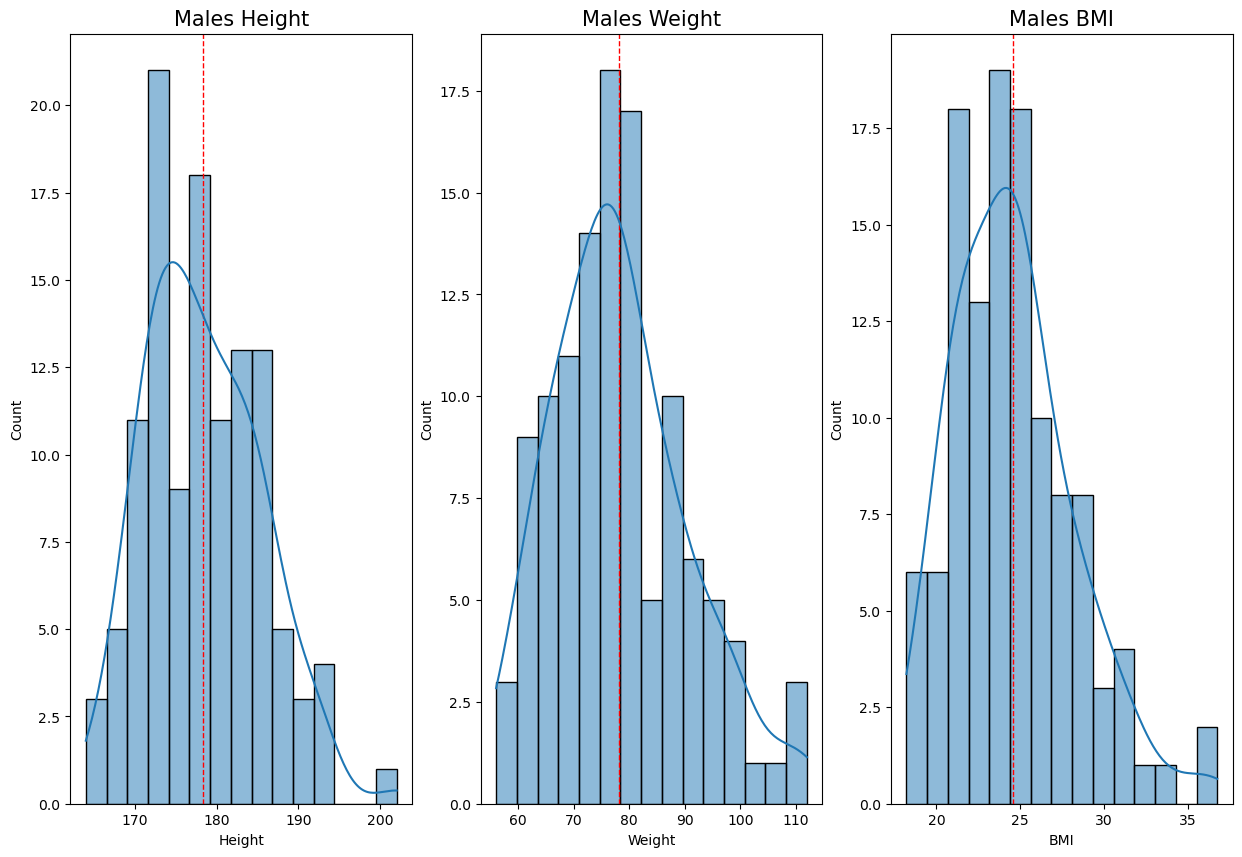

In [25]:
# Creating a dstribuition plot for height, weight and BMI for males

fig, axs = plt.subplots(figsize=(15, 10), ncols=3)

axs[0].axvline(h_mean_males, color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Males Height', size=15)
sns.histplot(kde=True, data=males['Height'], bins = 15, ax=axs[0])



axs[1].axvline(w_mean_males, color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Males Weight', size=15)
sns.histplot(kde=True, data=males['Weight'], bins = 15, ax=axs[1])

            
axs[2].axvline(bmi_mean_males, color='r', linestyle='dashed', linewidth=1)
axs[2].set_title('Males BMI', size=15)
sns.histplot(kde=True, data=males['BMI'], bins = 15, ax=axs[2])



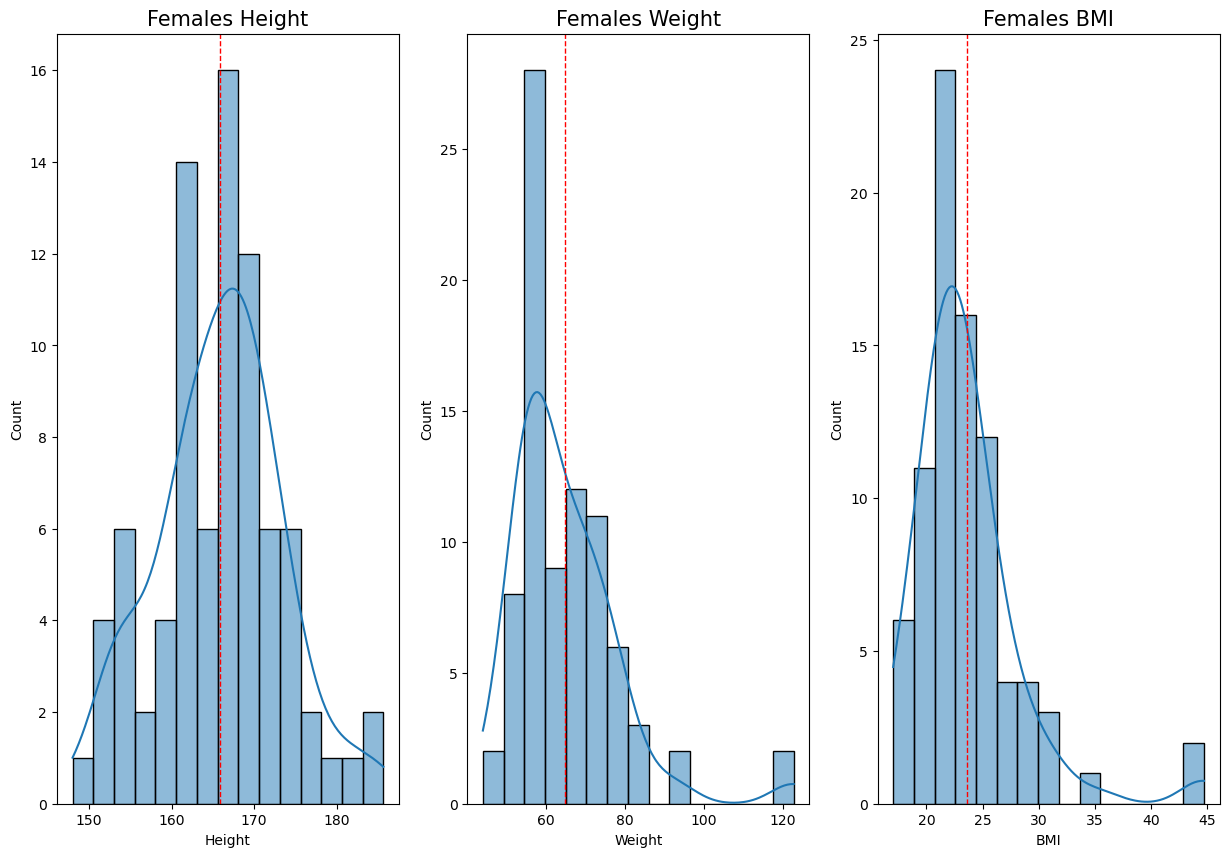

In [26]:
# Creating a dstribuition plot for height and weight for females

fig, axs = plt.subplots(figsize=(15, 10), ncols=3)

sns.histplot(kde=True, data=females['Height'], bins = 15, ax=axs[0])
axs[0].set_title('Females Height', size=15)
axs[0].axvline(h_mean_females, color='r', linestyle='dashed', linewidth=1)

sns.histplot(kde=True, data=females['Weight'], bins = 15, ax=axs[1])
axs[1].set_title('Females Weight', size=15)
axs[1].axvline(w_mean_females, color='r', linestyle='dashed', linewidth=1)

sns.histplot(kde=True, data=females['BMI'], bins = 15, ax=axs[2])
axs[2].set_title('Females BMI', size=15)
axs[2].axvline(bmi_mean_females, color='r', linestyle='dashed', linewidth=1)


Human heights are assumed to be [normaly distribuited](http://www.math.iup.edu/~clamb/class/math217/3_1-normal-distribution/), however in our case, our database have some skewness on it, and it become more evident since we only have 100 datapoints for each male and females.

Observing the plots above we can see that most of the data has a certain level of left [skewness](https://www.scribbr.com/statistics/skewness/#:~:text=Right%20skew%20),  with exception of females height that is skewed to the right.
#### Skewness
Skewness is the measurement of how much a distribution is asymmetric and it can be positive, negative or have zero skewness.
-	Positive skewness also known as right skew is when the median value is smaller than the mean value. This is what is happening in most of our plots.
-	Negative Positive skewness also known as left skew is when opposite to the right skew, the median value is higher than the mean value, this can been seen on the Females height plot.
-	Zero skew is when both median and mean are the same and happens when values are normally distributed 

We can calculate the skewness of a distribuition by using the [skew()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) function from the scipy.stats module.


Even with our data showing some skewness after some research [here](https://plus.maths.org/content/normal-distribution) and [here](https://en.wikipedia.org/wiki/Normal_distribution#cite_note-49). We decided to use the normal distribuition as the type of distribuition to simulate the data.

### Normal Distribuition

Normal Distribution, also known as Gaussian or Gauss distribution is a type of probability distribution where the data near to the mean occur more frequently than the data far from the mean. When plotted, normal distribution will display a curve called “bell curve” due to its shape. The normal distribution is a type of symmetrical distribution. Symmetrical distribution are distribution where the mean, median, and mode have the same value and occur at the same spot and represent the highest point of the distribution.

**Mean, Median and Mode:**,
    
 - **Mean:** The mean represents the highest point in the normal distribution graph, its peak and most of the values or data points are clustered around it. Changing the value of the mean will cause the graph representation of the normal distribution to move its curve either to the right or to the left.<br>  

 - **Mode:** is the most common score, in the distribution, and since the most common score is the one that occurs at the peak of the distribution and the mean also represents the highest point in the distribution, therefore the mean and the mode are the same value in the normal distribution.
 
 - **Median:** is the score positioned in the middle of the dataset when it is ordered in an ascending way and since the normal distribution is symmetrical, meaning that the middle point is the highest value of the normal distribution curve and also the same value as the mean and the mode."

# Simulating the Data

To simulate our data we are going to use the Python's [Numpy](https://numpy.org/doc/stable/reference/random/generator.html). package. More specifically the <i>[numpy.random.Generator.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal)</i> function. For the generator part, we are going to assign it to a variable (rng). The normal function can take up three parameters. The mean, the standard deviation, and the output shape/size. And will return a array of normally distributed values following the parameters entered. 

In [27]:
# https://numpy.org/doc/stable/reference/generated/numpy.sort.html
# Initializing the Random Generator
# Seed add for Z score calculation, remove to make it random again.
rng = np.random.default_rng(0)


#Simulating values for males height, weight and BMI 
size = 500
male= ['Male']

m_normal_height = rng.normal(loc=h_mean_males, scale=h_std_males, size=size)

m_normal_weight = rng.normal(loc=w_mean_males, scale=w_std_males, size=size)

m_normal_bmi = rng.normal(loc=bmi_mean_males, scale=bmi_std_males, size=size)

male=np.random.choice(male, size)

In [28]:
#Populating the male dfwith the simulated Data
df_male = pd.DataFrame(columns=['Gender', 'Height','Weight', 'BMI'])
df_male['Gender'] = male
df_male['Height'] = m_normal_height
df_male['Weight'] = m_normal_weight 
df_male['BMI'] = m_normal_bmi
df_male = df_male.round(0)
df_male

,Gender,Height,Weight,BMI
0,Male,179.0,94.0,29.0
1,Male,177.0,84.0,26.0
2,Male,183.0,58.0,25.0
3,Male,179.0,69.0,26.0
4,Male,175.0,93.0,20.0
...,...,...,...,...
495,Male,165.0,101.0,20.0
496,Male,177.0,72.0,28.0
497,Male,183.0,95.0,25.0
498,Male,169.0,70.0,19.0


In [29]:
#Simulating values for males height, weight and BMI 
female = ['Female']
female=np.random.choice(female, size)

f_normal_height = rng.normal(loc=h_mean_females, scale=h_std_females, size=size)

f_normal_weight = rng.normal(loc=w_mean_females, scale=w_std_females, size=size)

f_normal_bmi = rng.normal(loc=bmi_mean_females, scale=bmi_std_females, size=size)

In [30]:
#Populating the female df with the simulated Data
df_female = pd.DataFrame(columns=['Gender', 'Height','Weight', 'BMI'])
df_female['Gender'] = female
df_female['Height'] = f_normal_height
df_female['Weight'] = f_normal_weight 
df_female['BMI'] = f_normal_bmi
df_female = df_female.round(0)
df_female

,Gender,Height,Weight,BMI
0,Female,175.0,70.0,20.0
1,Female,161.0,58.0,13.0
2,Female,157.0,53.0,19.0
3,Female,164.0,43.0,21.0
4,Female,160.0,42.0,31.0
...,...,...,...,...
495,Female,171.0,43.0,16.0
496,Female,162.0,57.0,28.0
497,Female,151.0,74.0,16.0
498,Female,159.0,68.0,14.0


In [31]:
# Concatenating both DF
simulated_df = pd.concat([df_male, df_female], ignore_index=True)

In [32]:
simulated_df

,Gender,Height,Weight,BMI
0,Male,179.0,94.0,29.0
1,Male,177.0,84.0,26.0
2,Male,183.0,58.0,25.0
3,Male,179.0,69.0,26.0
4,Male,175.0,93.0,20.0
...,...,...,...,...
995,Female,171.0,43.0,16.0
996,Female,162.0,57.0,28.0
997,Female,151.0,74.0,16.0
998,Female,159.0,68.0,14.0


- ### **Simulated Dataset**

In [33]:

s_df = simulated_df

In [34]:
s_df

,Gender,Height,Weight,BMI
0,Male,179.0,94.0,29.0
1,Male,177.0,84.0,26.0
2,Male,183.0,58.0,25.0
3,Male,179.0,69.0,26.0
4,Male,175.0,93.0,20.0
...,...,...,...,...
995,Female,171.0,43.0,16.0
996,Female,162.0,57.0,28.0
997,Female,151.0,74.0,16.0
998,Female,159.0,68.0,14.0


- ### Plotting the simulated data

Using MatPlotLib and Seaborn, we are going to plot the height, weight and BMI from our simulated dataset for males and females.


### - Plotting males data

<AxesSubplot:title={'center':'Males BMI'}, xlabel='BMI', ylabel='Count'>

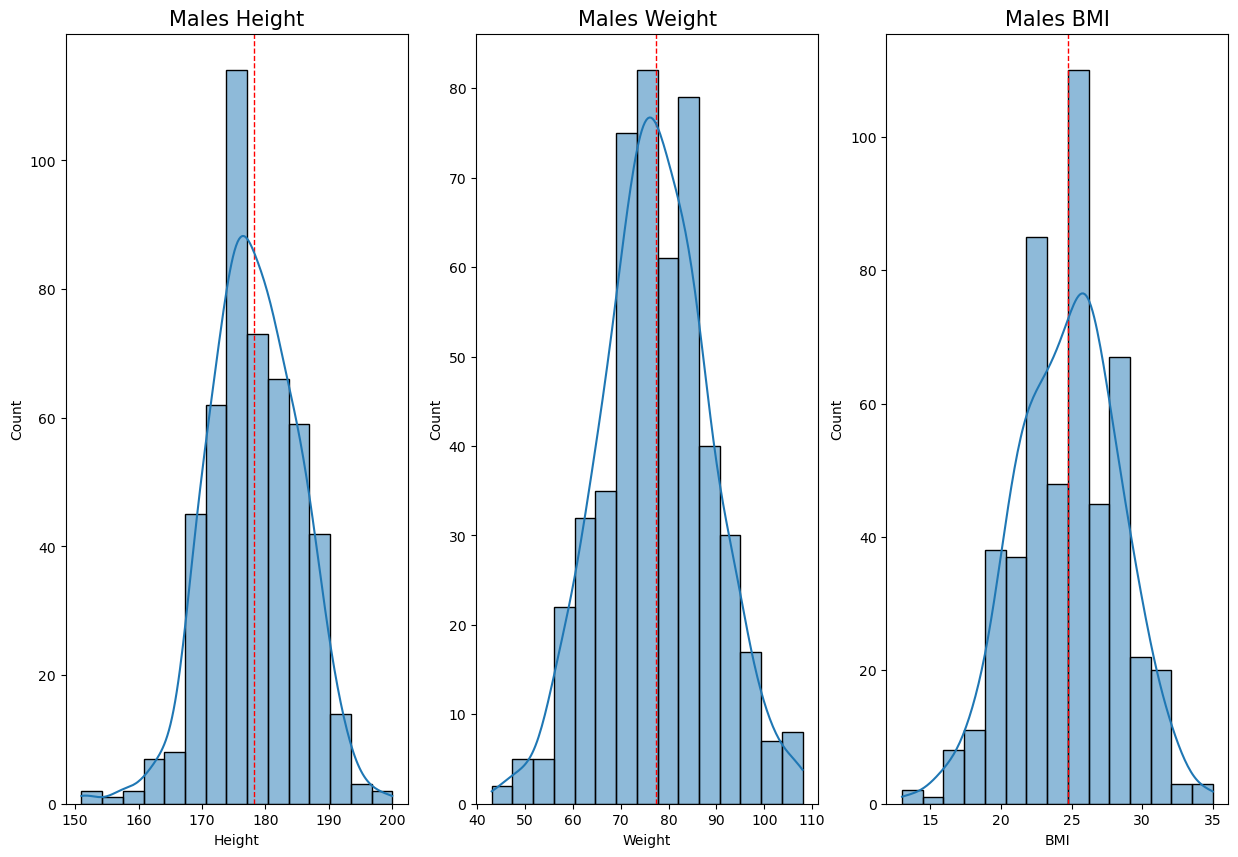

In [35]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=3)

# Males Height Plot
axs[0].axvline(df_male['Height'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Males Height', size=15)
sns.histplot(kde=True, data=df_male['Height'], ax=axs[0], bins = 15)

# Males Weight Plot
axs[1].axvline(df_male['Weight'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Males Weight', size=15)
sns.histplot(kde=True, data=df_male['Weight'], ax=axs[1], bins = 15)

# Males BMI Plot
axs[2].axvline(df_male['BMI'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[2].set_title('Males BMI', size=15)
sns.histplot(kde=True, data=df_male['BMI'], ax=axs[2], bins = 15)

### - Plotting  females data

<AxesSubplot:title={'center':'Females BMI'}, xlabel='BMI', ylabel='Count'>

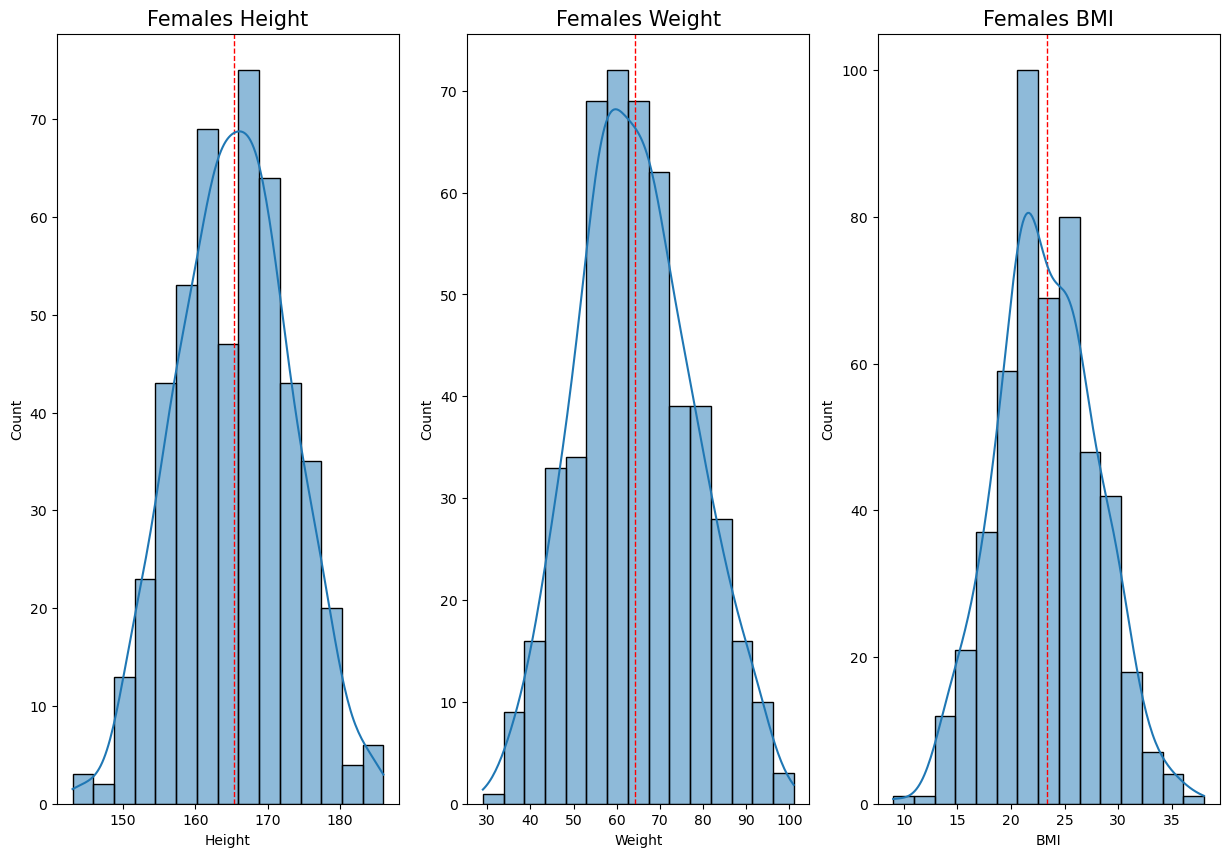

In [36]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=3)

# Females Height Plot
axs[0].axvline(df_female['Height'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Females Height', size=15)
sns.histplot(kde=True, data=df_female['Height'], ax=axs[0], bins = 15)

# Females Weight Plot
axs[1].axvline(df_female['Weight'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Females Weight', size=15)
sns.histplot(kde=True, data=df_female['Weight'], ax=axs[1], bins = 15)

# Females BMI Plot
axs[2].axvline(df_female['BMI'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[2].set_title('Females BMI', size=15)
sns.histplot(kde=True, data=df_female['BMI'], ax=axs[2], bins = 15)

### Plotting BMI for males and females

<AxesSubplot:title={'center':'Females BMI'}, xlabel='BMI', ylabel='Count'>

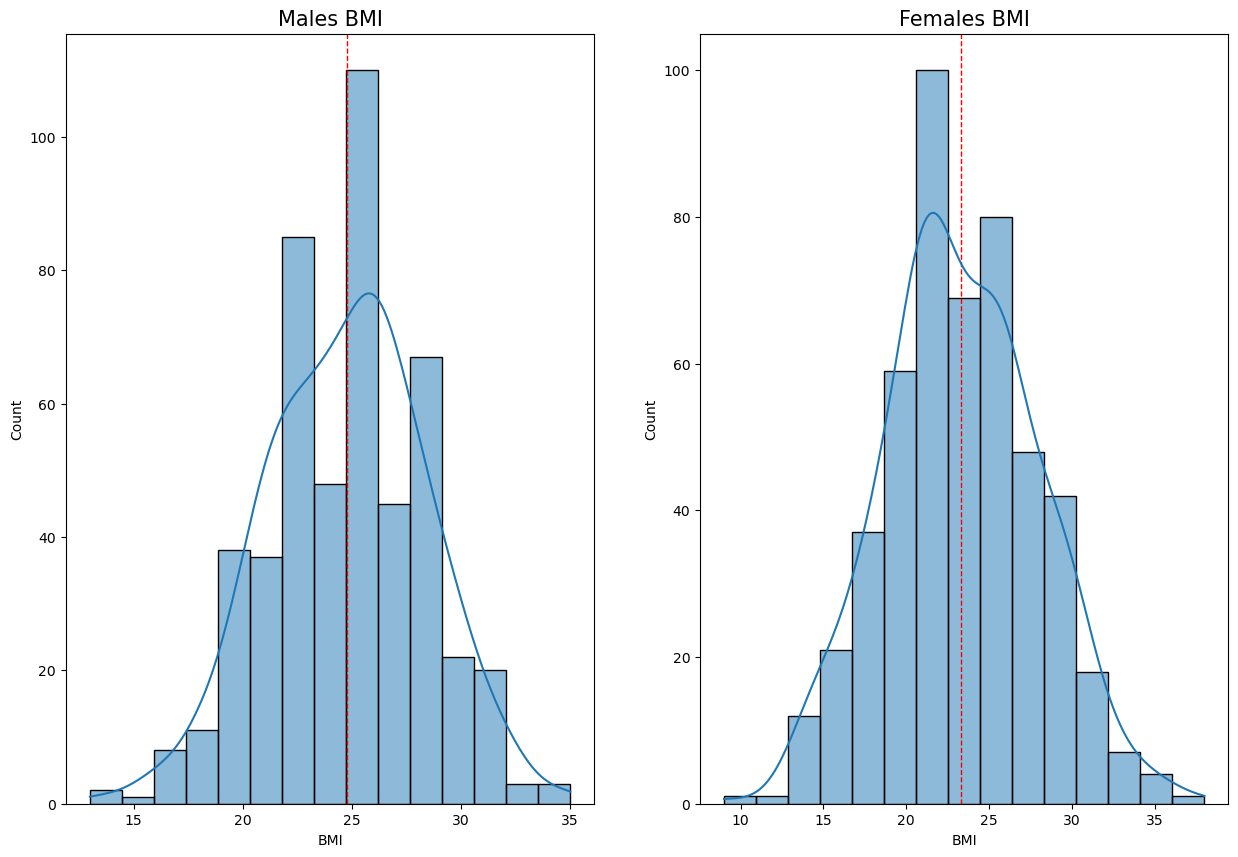

In [37]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=2)

# Males BMI Plot
axs[0].axvline(df_male['BMI'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[0].set_title('Males BMI', size=15)
sns.histplot(kde=True, data=df_male['BMI'] ,ax=axs[0], bins = 15)

# Females BMI Plot
axs[1].axvline(df_female['BMI'].mean(), color='r', linestyle='dashed', linewidth=1)
axs[1].set_title('Females BMI', size=15)
sns.histplot(kde=True, data=df_female['BMI'], ax=axs[1], bins = 15)

## Z Score

Z score s the calculation of how many standards deviations a data point is away from the mean. We are going to use it to find out where the 25 BIM index is in each one of the males and females normal distribuition. 

The formula to calculate the Z score is z = (x – μ) / σ. 
</br>
Where:
    **x** = the data point value.
    **μ** = the mean and;
    **σ** = the standard deviation
    
Our data point value is 25, which is the minimum BMI index for someone to be classified as overweight according to the [CDC BMI Table](https://www.cdc.gov/obesity/basics/adult-defining.html). The mean and standard deviation will be taken from the previously calculated BMI values from males e females.

#### Calculating the Z score for the male data.


In [38]:
x = 25
m_mean = df_male['BMI'].mean()
male_z = (x-m_mean)/bmi_std_males
print("The Z score for males BMI is: {:.3f}".format(male_z))

The Z score for males BMI is: 0.066


#### Calculating the Z score for the female data.


In [39]:
x = 25
f_mean = df_female['BMI'].mean()
male_z = (x-f_mean)/bmi_std_females
print("The Z score for females BMI is: {:.3f}".format(male_z))

The Z score for females BMI is: 0.355


How do we use the Z score calculated? To make sense of what Z score means, we need to use the standard deviation [Z score table]( https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf), it shows the percentage of datapoints located to the left of the Z values, in other words, the percentage of the population that with values smaller that the data point value located at the Z score. For us that means the percentage of datapoints that are less than 25 which is the minimum BMI to be considered overweigh.

Because our simulated data is randomly generated. The Z score for males and females will vary each time. However, it will always show that in our simulated data, males are more likely to be overweight than females because their Z score are smaller than the females.



### Comparing the Original and Simulated DF.

In [40]:
df.describe()

,Height,Weight,BMI
count,200.000000,200.000000,200.000000
mean,173.170100,72.635000,24.164900
std,9.495707,14.246206,4.132002
min,148.000000,44.000000,17.030000
25%,167.247500,61.000000,21.410000
50%,173.000000,71.330000,23.575000
75%,180.000000,80.082500,25.972500
max,202.000000,122.670000,44.750000


In [41]:
s_df.describe()

,Height,Weight,BMI
count,1000.000000,1000.000000,1000.000000
mean,171.760000,70.856000,24.038000
std,9.826544,13.930733,4.249072
min,143.000000,29.000000,9.000000
25%,165.000000,61.000000,21.000000
50%,172.000000,71.000000,24.000000
75%,179.000000,81.000000,27.000000
max,200.000000,108.000000,38.000000


## Conclusion




There are several ways to simulated real world data, for this project we used Numpy's Random module, more specific the normal distribuition one. We could also have used Scipy(scipy.stats.skewnorm) for weights. However, Numpy's module proved to be a good choice as the simulated data looks really simmilar to the original data. 